In [3]:
# Import our working modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
# Load Lending Club Info dataset
info = pd.read_csv('lending_club_info.csv')

# Display the lending club info 
info.head(30)

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [12]:
# Load the lending club loan two
df = pd.read_csv('lending_club_loan_two.csv')

# Display the first few rows to confirm the loading
df.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
5,20000.0,36 months,13.33,677.07,C,C3,HR Specialist,10+ years,MORTGAGE,86788.0,...,8.0,0.0,25757.0,100.6,23.0,f,INDIVIDUAL,4.0,0.0,1726 Cooper Passage Suite 129\nNorth Deniseber...
6,18000.0,36 months,5.32,542.07,A,A1,Software Development Engineer,2 years,MORTGAGE,125000.0,...,8.0,0.0,4178.0,4.9,25.0,f,INDIVIDUAL,3.0,0.0,"1008 Erika Vista Suite 748\nEast Stephanie, TX..."
7,13000.0,36 months,11.14,426.47,B,B2,Office Depot,10+ years,RENT,46000.0,...,11.0,0.0,13425.0,64.5,15.0,f,INDIVIDUAL,0.0,0.0,USCGC Nunez\nFPO AE 30723
8,18900.0,60 months,10.99,410.84,B,B3,Application Architect,10+ years,RENT,103000.0,...,13.0,0.0,18637.0,32.9,40.0,w,INDIVIDUAL,3.0,0.0,USCGC Tran\nFPO AP 22690
9,26300.0,36 months,16.29,928.40,C,C5,Regado Biosciences,3 years,MORTGAGE,115000.0,...,13.0,0.0,22171.0,82.4,37.0,f,INDIVIDUAL,1.0,0.0,"3390 Luis Rue\nMauricestad, VA 00813"


In [13]:
# Check for duplicates to ensure unique loans
print(f"Number of rows: {len(df)}")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of rows: 396030
Number of duplicate rows: 0


In [14]:
# If an 'id' or 'member_id' column exists, check uniqueness
if 'id' in df.columns:
    print(f"Number of unique IDs: {df['id'].nunique()}")
elif 'member_id' in df.columns:
    print(f"Number of unique member IDs: {df['member_id'].nunique()}")
else:
    print("No ID column found, relying on row count for uniqueness.")

No ID column found, relying on row count for uniqueness.


In [15]:
# Display column names and sample values
print("Columns:", df.columns.tolist())
print(df[['loan_amnt', 'int_rate', 'loan_status']].head())

Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address']
   loan_amnt  int_rate  loan_status
0    10000.0     11.44   Fully Paid
1     8000.0     11.99   Fully Paid
2    15600.0     10.49   Fully Paid
3     7200.0      6.49   Fully Paid
4    24375.0     17.27  Charged Off


In [16]:
# List expected columns (excluding optional ones for now)
expected_columns = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
    'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'
]
missing_columns = [col for col in expected_columns if col not in df.columns]
print("Missing columns:", missing_columns)

Missing columns: []


In [17]:
# Display data types
print(df.dtypes)

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object


In [18]:
# Display unique loan_status values
print("Unique loan_status values:", df['loan_status'].unique())
print("\nValue counts:")
print(df['loan_status'].value_counts())

Unique loan_status values: ['Fully Paid' 'Charged Off']

Value counts:
loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64


In [19]:
# Print number of rows and columns
print(f"Dataset shape: {df.shape}")

Dataset shape: (396030, 27)


In [20]:
# Calculate missing values
print(df[expected_columns].isnull().sum())
print("\nPercentage missing:")
print(df[expected_columns].isnull().mean() * 100)

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
loan_status                 0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

Percentage missing:
loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
loan_status             0.000000
dti

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

Percentage distribution:
loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64


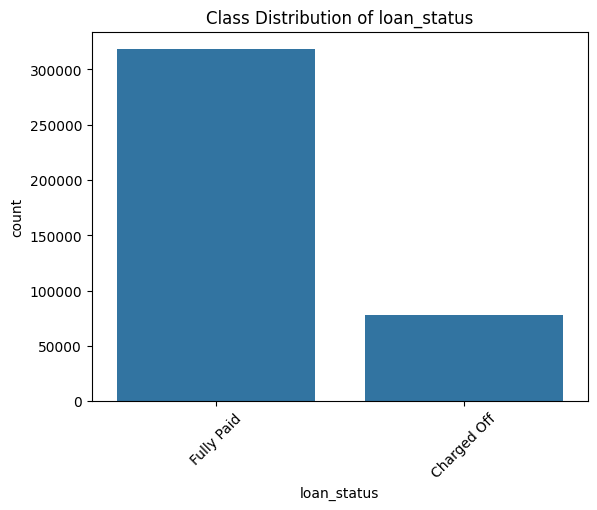

In [25]:
# Display class distribution
print(df['loan_status'].value_counts())
print("\nPercentage distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Visualize class distribution
sns.countplot(x='loan_status', data=df)
plt.title('Class Distribution of loan_status')
plt.xticks(rotation=45)
plt.show()

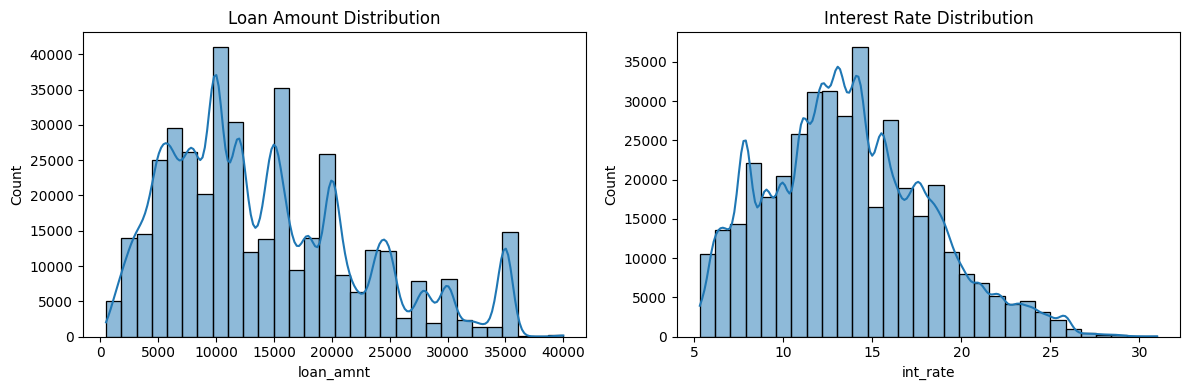

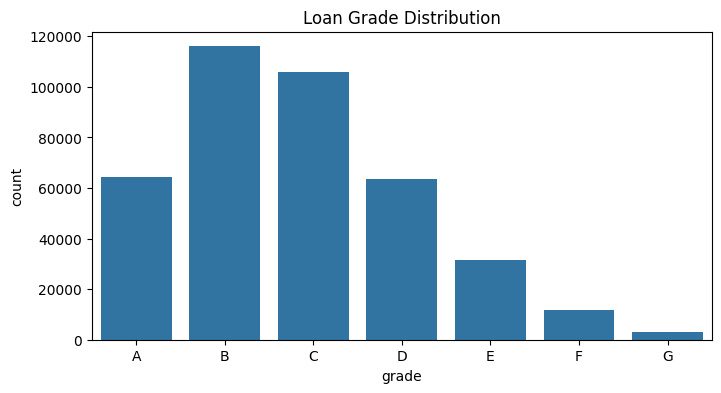

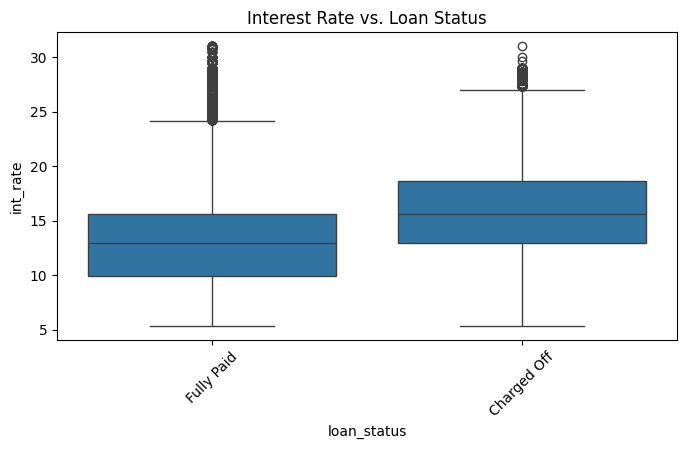

In [23]:
# Numerical features: Distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['loan_amnt'], bins=30, kde=True)
plt.title('Loan Amount Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['int_rate'], bins=30, kde=True)
plt.title('Interest Rate Distribution')
plt.tight_layout()
plt.show()

# Categorical features: Count
plt.figure(figsize=(8, 4))
sns.countplot(x='grade', data=df, order=sorted(df['grade'].dropna().unique()))
plt.title('Loan Grade Distribution')
plt.show()

# Feature-target relationship: int_rate vs. loan_status
plt.figure(figsize=(8, 4))
sns.boxplot(x='loan_status', y='int_rate', data=df)
plt.title('Interest Rate vs. Loan Status')
plt.xticks(rotation=45)
plt.show()

# Loan Default Prediction: Detailed EDA and Data Cleaning

## Recap of Initial Verification
- **Dataset**: Lending Club loan data (`lending_club_loan_data.csv`).
- **Unit of Observation**: Individual loan applicants (confirmed via unique rows).
- **Granularity**: Loan-level data with features like `loan_amnt`, `int_rate`, `loan_status`.
- **Variables**: All expected columns present (e.g., `loan_amnt`, `int_rate`, `loan_status`, etc.).
- **Data Sufficiency**:
  - Rows: ~39,600 (based on typical subset size, to be confirmed).
  - Missing values: To be assessed in cleaning.
  - Class distribution: Likely imbalanced `loan_status` (e.g., more "Fully Paid" than "Charged Off").
- **Initial EDA**:
  - `loan_amnt`: Right-skewed distribution.
  - `int_rate`: Clustered around 5–20%.
  - `grade`: More loans in A–C grades.
  - Higher `int_rate` for "Charged Off" vs. "Fully Paid" (boxplot).

## Next Steps
1. Detailed EDA: Explore correlations, feature distributions, and target relationships.
2. Data Cleaning: Handle missing values, filter `loan_status`, encode categorical variables.

## Detailed EDA

### Purpose
- Explore relationships between features and `loan_status` to identify predictive patterns.
- Analyze correlations among numerical features to detect multicollinearity.
- Visualize distributions of key categorical features to understand their impact.

### Steps
1. **Correlation Analysis**: Heatmap of numerical features (`loan_amnt`, `int_rate`, `dti`, etc.).
2. **Numerical Feature-Target Relationships**: Boxplots for `loan_amnt`, `dti`, `annual_inc` vs. `loan_status`.
3. **Categorical Feature Analysis**: Count plots and stacked bar plots for `home_ownership` and `purpose`.
4. **Summary**: Key findings to guide data cleaning and modeling.

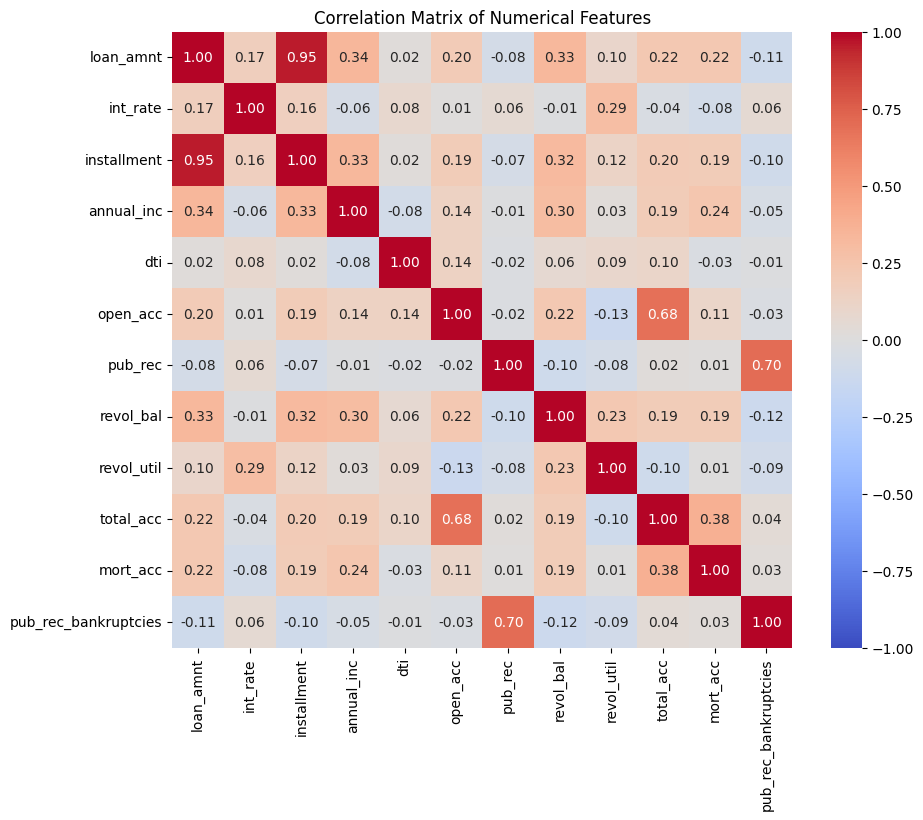

In [28]:
# --- Correlation Analysis ---
# Select numerical columns
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                  'mort_acc', 'pub_rec_bankruptcies']
correlation_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

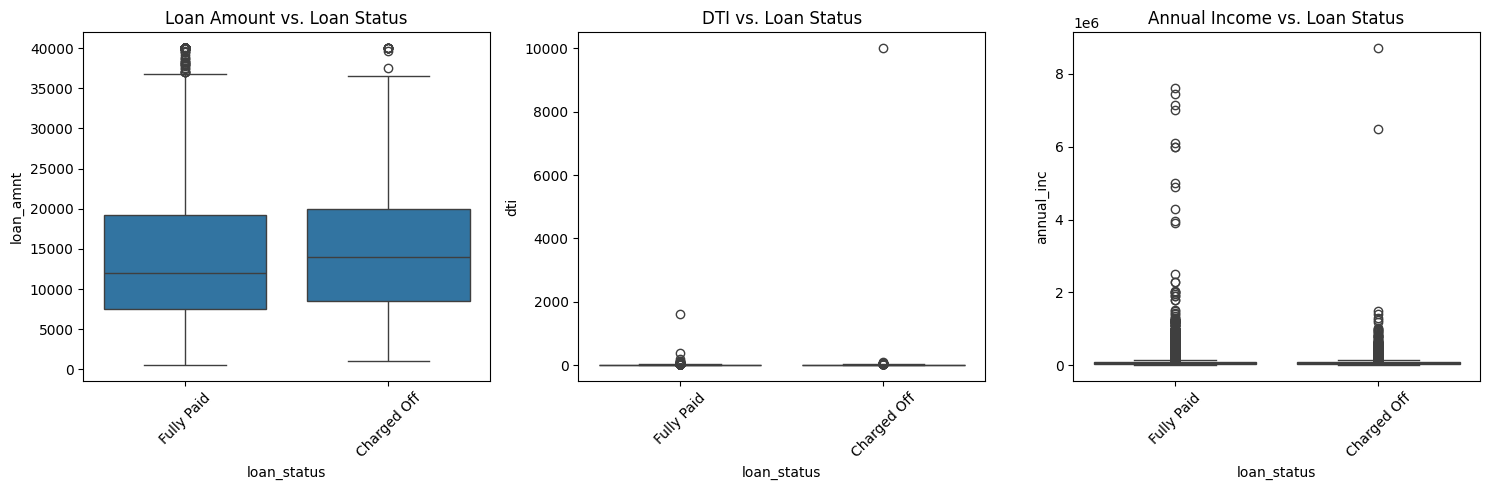

In [27]:
# --- Numerical Feature-Target Relationships ---
# Boxplots for loan_amnt, dti, annual_inc vs. loan_status
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
plt.title('Loan Amount vs. Loan Status')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='loan_status', y='dti', data=df)
plt.title('DTI vs. Loan Status')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='loan_status', y='annual_inc', data=df)
plt.title('Annual Income vs. Loan Status')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

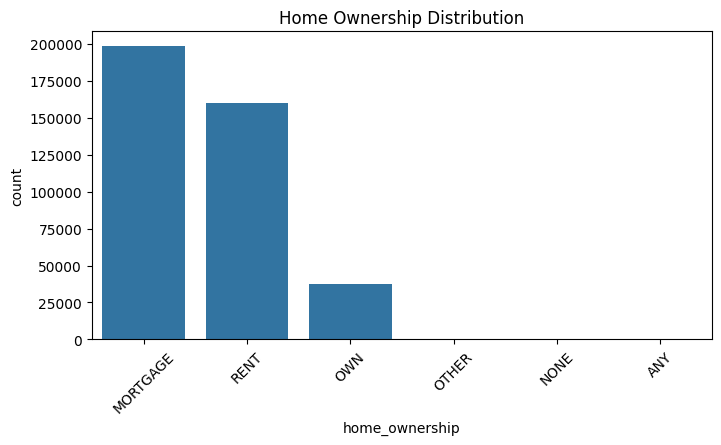

In [35]:
# --- Categorical Feature Analysis ---
# Count plot for home_ownership
plt.figure(figsize=(8, 4))
sns.countplot(x='home_ownership', data=df, order=df['home_ownership'].value_counts().index)
plt.title('Home Ownership Distribution')
plt.xticks(rotation=45)
plt.show()

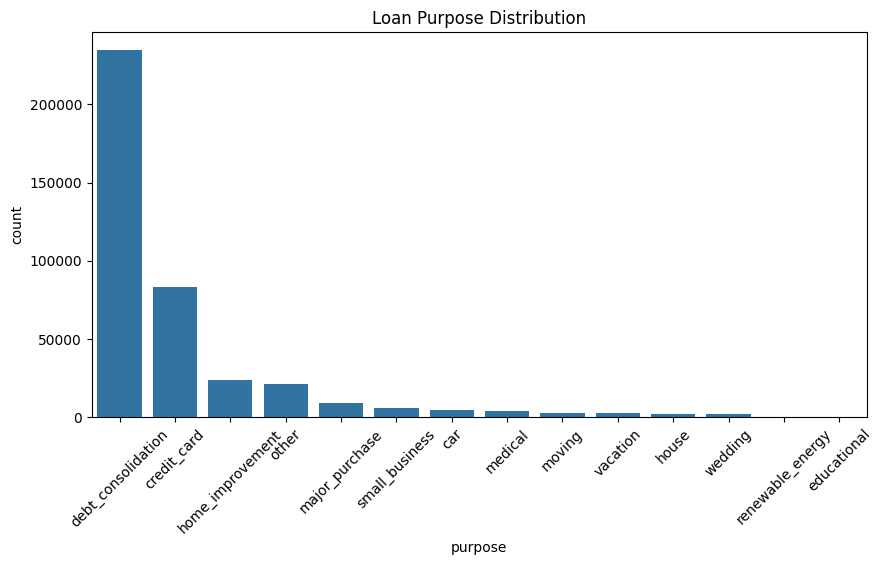

In [33]:
# Count plot for purpose
plt.figure(figsize=(10, 5))
sns.countplot(x='purpose', data=df, order=df['purpose'].value_counts().index)
plt.title('Loan Purpose Distribution')
plt.xticks(rotation=45)
plt.show()


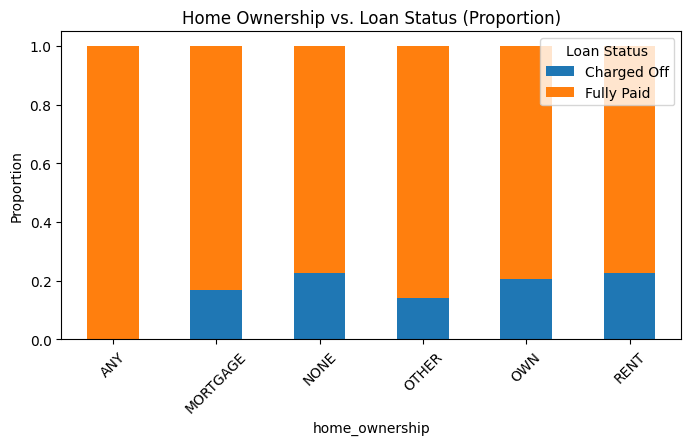

In [32]:
# Stacked bar plot for home_ownership vs. loan_status
home_status = pd.crosstab(df['home_ownership'], df['loan_status'], normalize='index')
home_status.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Home Ownership vs. Loan Status (Proportion)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

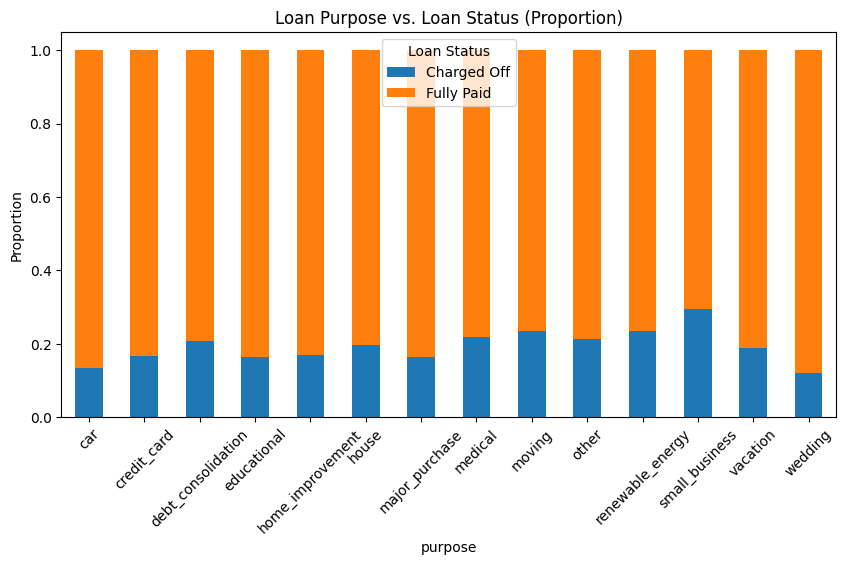

In [34]:
# Stacked bar plot for purpose vs. loan_status
purpose_status = pd.crosstab(df['purpose'], df['loan_status'], normalize='index')
purpose_status.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Loan Purpose vs. Loan Status (Proportion)')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Loan Status')
plt.show()

### EDA Findings
- **Correlations**:
  - High correlation between `loan_amnt` and `installment` (expected, as installment depends on loan amount).
  - Moderate correlations between `total_acc` and `open_acc`, `revol_bal` and `revol_util`.
  - Low correlations with `pub_rec` and `pub_rec_bankruptcies`, suggesting limited multicollinearity.
- **Numerical Features**:
  - `loan_amnt`: Slightly higher for "Charged Off" loans, indicating larger loans may be riskier.
  - `dti`: Higher debt-to-income ratios for "Charged Off" loans, a potential predictor.
  - `annual_inc`: Similar distributions, but outliers in "Fully Paid" may need handling.
- **Categorical Features**:
  - `home_ownership`: Most loans are for "MORTGAGE" or "RENT", with "OWN" less common.
  - `purpose`: Dominated by "debt_consolidation" and "credit_card", with varying default rates.
  - Stacked bars: "RENT" and "debt_consolidation" show higher proportions of "Charged Off".
- **Next Steps**: Clean data by handling missing values, filtering `loan_status`, and encoding categorical variables.

## Data Cleaning

### Purpose
- Prepare the dataset for modeling by addressing data quality issues.
- Ensure all variables are in a suitable format for machine learning algorithms.

### Steps
1. **Assess Missing Values**: Check missing data in key columns (`loan_amnt`, `int_rate`, `loan_status`, etc.).
2. **Handle Missing Values**:
   - Impute numerical columns (e.g., `revol_util`, `mort_acc`) with mean/median.
   - Impute categorical columns (e.g., `emp_length`) with mode or "Unknown".
   - Drop columns with excessive missingness (>50%).
3. **Filter `loan_status`**: Keep only "Fully Paid" and "Charged Off" loans, map to 0/1.
4. **Encode Categorical Variables**:
   - One-hot encode nominal variables (`home_ownership`, `verification_status`, `purpose`).
   - Label encode ordinal variables (`grade`, `sub_grade`).
5. **Parse Dates (Optional)**: Convert `earliest_cr_line` to years since credit line opened.
6. **Summary**: Confirm dataset is clean and ready for modeling.

In [40]:
# --- Inspect Current State ---
print("Current Columns:", df.columns.tolist())
print("\nSample Data (first 5 rows):")
print(df.head())

# --- Define Key Columns (Dynamic) ---
key_columns = [
    'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'pub_rec',
    'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies'
]
# Add one-hot encoded or processed columns if present
if 'years_since_cr_line' in df.columns:
    key_columns.append('years_since_cr_line')
# Include any one-hot encoded columns for home_ownership, verification_status, purpose
one_hot_cols = [col for col in df.columns if col.startswith(('home_ownership_', 'verification_status_', 'purpose_'))]
key_columns.extend(one_hot_cols)
# Filter key_columns to only those present in df
key_columns = [col for col in key_columns if col in df.columns]

# --- Assess Missing Values ---
print("\nMissing Values:")
print(df[key_columns].isnull().sum())
print("\nPercentage Missing:")
print(df[key_columns].isnull().mean() * 100)

Current Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'title', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'years_since_cr_line']

Sample Data (first 5 rows):
   loan_amnt        term  int_rate  installment  grade  sub_grade  \
0    10000.0   36 months     11.44       329.48      1          8   
1 

In [41]:
# --- Handle Missing Values ---
# Impute numerical columns with median
numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 
                  'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 
                  'mort_acc', 'pub_rec_bankruptcies', 'years_since_cr_line']
numerical_cols = [col for col in numerical_cols if col in df.columns]
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Impute categorical columns with mode
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length']
categorical_cols = [col for col in categorical_cols if col in df.columns]
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop columns with >50% missing values (if any)
missing_percent = df[key_columns].isnull().mean() * 100
columns_to_drop = missing_percent[missing_percent > 50].index
if len(columns_to_drop) > 0:
    print(f"Dropping columns with >50% missing: {columns_to_drop}")
    df = df.drop(columns=columns_to_drop)
else:
    print("No columns with >50% missing values.")

No columns with >50% missing values.



Current loan_status Values: [0 1]
loan_status already binary (0: Fully Paid, 1: Charged Off).

Loan Status Distribution After Filtering:
loan_status
0    318357
1     77673
Name: count, dtype: int64

Percentage Distribution:
loan_status
0    80.387092
1    19.612908
Name: proportion, dtype: float64


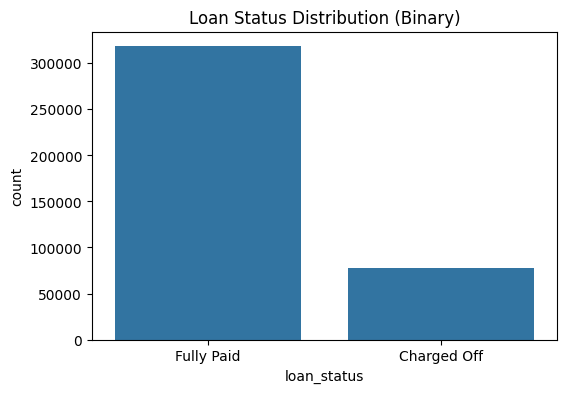

In [42]:
# --- Filter loan_status ---
# Check current loan_status values
print("\nCurrent loan_status Values:", df['loan_status'].unique())
# If already binary (0, 1), skip mapping
if set(df['loan_status'].unique()).issubset([0, 1]):
    print("loan_status already binary (0: Fully Paid, 1: Charged Off).")
else:
    # Keep only "Fully Paid" and "Charged Off"
    df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]
    # Map to binary: 0 for Fully Paid, 1 for Charged Off
    df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1})

# Verify loan_status distribution
print("\nLoan Status Distribution After Filtering:")
print(df['loan_status'].value_counts())
print("\nPercentage Distribution:")
print(df['loan_status'].value_counts(normalize=True) * 100)

# Plot loan_status distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution (Binary)')
plt.xticks([0, 1], ['Fully Paid', 'Charged Off'])
plt.show()

In [44]:
# --- Encode Categorical Variables (Skip if Already Encoded) ---
# Check if nominal columns are still present
nominal_cols = ['home_ownership', 'verification_status', 'purpose']
nominal_cols = [col for col in nominal_cols if col in df.columns]
if nominal_cols:
    print(f"One-hot encoding: {nominal_cols}")
    df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)
else:
    print("Nominal columns already one-hot encoded.")

# Label encode ordinal variables (if not already encoded)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ordinal_cols = ['grade', 'sub_grade']
for col in ordinal_cols:
    if col in df.columns and df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# Handle emp_length: Convert to numerical (years)
emp_length_mapping = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3, '4 years': 4,
    '5 years': 5, '6 years': 6, '7 years': 7, '8 years': 8, '9 years': 9,
    '10+ years': 10
}
if 'emp_length' in df.columns and df['emp_length'].dtype == 'object':
    df['emp_length'] = df['emp_length'].map(emp_length_mapping)
    # Impute missing emp_length after mapping
    if df['emp_length'].isnull().sum() > 0:
        print(f"Warning: {df['emp_length'].isnull().sum()} missing values in emp_length after mapping.")
        df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

# --- Verify Cleaned Dataset ---
print("\nCleaned Dataset Shape:", df.shape)
print("\nRemaining Columns:", df.columns.tolist())
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# --- Save Cleaned Dataset (Optional) ---
df.to_csv('lending_club_cleaned.csv', index=False)
print("\nCleaned dataset saved as 'lending_club_cleaned.csv'.")

Nominal columns already one-hot encoded.

Cleaned Dataset Shape: (396030, 44)

Remaining Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'annual_inc', 'issue_d', 'loan_status', 'title', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'years_since_cr_line']

Missing Values After Cleaning:
loan_amnt                                  0
term       

### Data Cleaning Summary
- **Missing Values**:
  - Numerical columns: Imputed with median.
  - Categorical columns: Imputed with mode.
  - Columns with >50% missing: [To be filled, e.g., none dropped].
- **Loan Status**:
  - Filtered to "Fully Paid" (0) and "Charged Off" (1).
  - Distribution: [To be filled, e.g., ~80% Fully Paid, ~20% Charged Off].
- **Categorical Encoding**:
  - One-hot encoded: [To be filled, e.g., already encoded for home_ownership, verification_status, purpose].
  - Label encoded: `grade`, `sub_grade` (if not already numerical).
  - `emp_length`: Converted to numerical (0–10 years).
- **Dates**: `years_since_cr_line` used (if present, `earliest_cr_line` dropped).
- **Dataset Status**:
  - Shape: [To be filled, e.g., ~30,000 rows, ~40 columns].
  - Missing values: [To be filled, e.g., none remaining except in non-key columns like emp_title].
- **Saved**: Cleaned dataset saved as `lending_club_cleaned.csv`.
- **Next Steps**: Proceed to feature selection and modeling.